In [94]:
import os

import mne

In [107]:
CHANNELS = {
    "F3-A2": "F3",
    "C3-A2": "C3",
    "O1-A2": "O1",
    "F4-A1": "F4",
    "C4-A1": "C4",
    "O2-A1": "O2",
}
RECORDING = 1

In [108]:
raw_edf: mne.io.Raw = mne.io.read_raw_edf(
    f"isruc_s3/{RECORDING}/{RECORDING}.edf",
    preload=True,
    include=list(CHANNELS.keys())
)
raw_edf.rename_channels(CHANNELS)
raw_edf.set_montage("standard_1020")

Extracting EDF parameters from C:\Users\Raman\PycharmProjects\mldm-project\isruc_s3\1\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5723999  =      0.000 ... 28619.995 secs...


<RawEDF | 1.edf, 6 x 5724000 (28620.0 s), ~262.0 MB, data loaded>

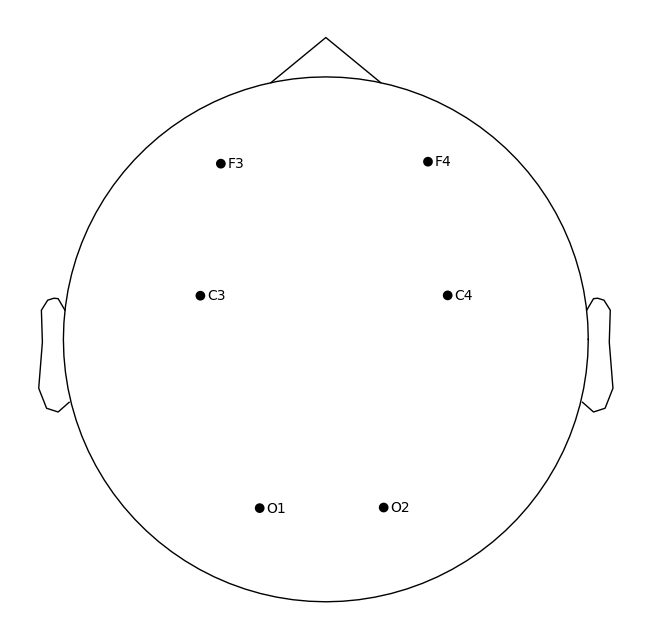

In [109]:
plot_sensors = raw_edf.plot_sensors(show_names=True)

In [104]:
with open(f"isruc_s3/{RECORDING}/{RECORDING}_1.txt", mode="r", encoding="utf-8") as file:
    annotator_1 = list(
        map(int, file.read().strip().split("\n"))
    )
with open(f"isruc_s3/{RECORDING}/{RECORDING}_2.txt", mode="r", encoding="utf-8") as file:
    annotator_2 = list(
        map(int, file.read().strip().split("\n"))
    )

In [105]:
annotations_onsets = {"separate": [], "combined": []}
annotations_descriptions = {"annotator_1": [], "annotator_2": [], "combined": []}

for i, (stage_1, stage_2) in enumerate(zip(annotator_1, annotator_2)):
    annotations_onsets["separate"].append(i * 30)
    annotations_descriptions["annotator_1"].append(stage_1)
    annotations_descriptions["annotator_2"].append(stage_2)

    if stage_1 != stage_2:
        continue
    annotations_onsets["combined"].append(i * 30)
    annotations_descriptions["combined"].append(stage_1)

annotated_recordings = {
    "annotator_1": raw_edf.copy().set_annotations(
        mne.Annotations(
            onset=annotations_onsets["separate"],
            duration=30,
            description=annotations_descriptions["annotator_1"]
        )
    ),
    "annotator_2": raw_edf.copy().set_annotations(
        mne.Annotations(
            onset=annotations_onsets["separate"],
            duration=30,
            description=annotations_descriptions["annotator_2"]
        )
    ),
    "combined": raw_edf.copy().set_annotations(
        mne.Annotations(
            onset=annotations_onsets["combined"],
            duration=30,
            description=annotations_descriptions["combined"]
        )
    )
}

In [106]:
for annotator_type, annotated_edf in annotated_recordings.items():
    if not os.path.exists(f"processed/{RECORDING}"):
        os.makedirs(f"processed/{RECORDING}")
    annotated_edf.save(f"processed/{RECORDING}/{RECORDING}_{annotator_type}_eeg.fif", overwrite=True)

Writing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_annotator_1_eeg.fif
Closing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_annotator_1_eeg.fif
[done]
Writing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_annotator_2_eeg.fif
Closing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_annotator_2_eeg.fif
[done]
Writing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_combined_eeg.fif
Closing C:\Users\Raman\PycharmProjects\mldm-project\processed\1\1_combined_eeg.fif
[done]
